In [1]:
# LSTM ?
# RNN ?
# find and load the data
# closing price
# how much price move with previos and current closing price
# fit with previous candle to current
# closing price

# --------------------------------------------------------------------
# Bitcoin price prediction
# 1. Find dataset with bitcoin price
# 2. Show Bitcoin chart
# 3. Convert data into Keras data format to feed model
# 4. devide data for train and test in a special way get data which is last month old for testing to know how accurate model is
# 5. difference beetween price???
# 6. try with standart metrix



In [2]:
import yfinance as yf

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split


In [23]:
# 1. Find dataset with bitcoin price

# Завантажуємо дані Bitcoin (BTC-USD — біткоїн до долара)
data = yf.download('BTC-USD', start='2020-01-01', end="2025-10-10", interval='1d')
data_test = yf.download('BTC-USD', start='2025-01-10', interval='1d')

normalizer = 1000000

# Переглядаємо перші рядки
print(data.head())
print(data.tail())


C:\Users\Denys\AppData\Local\Temp\ipykernel_8580\449697881.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('BTC-USD', start='2020-01-01', end="2025-10-10", interval='1d')
[*********************100%***********************]  1 of 1 completed
C:\Users\Denys\AppData\Local\Temp\ipykernel_8580\449697881.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_test = yf.download('BTC-USD', start='2025-01-10', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD      BTC-USD
Date                                                                       
2020-01-01  7200.174316  7254.330566  7174.944336  7194.892090  18565664997
2020-01-02  6985.470215  7212.155273  6935.270020  7202.551270  20802083465
2020-01-03  7344.884277  7413.715332  6914.996094  6984.428711  28111481032
2020-01-04  7410.656738  7427.385742  7309.514160  7345.375488  18444271275
2020-01-05  7411.317383  7544.497070  7400.535645  7410.451660  19725074095
Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2025-10-05  123513.476562  125559.210938  122191.960938  122419.671875   
2025-10-06  124752.531250  126198.070312  123196.046875  123510.453125   
2025-10-07  121451.382

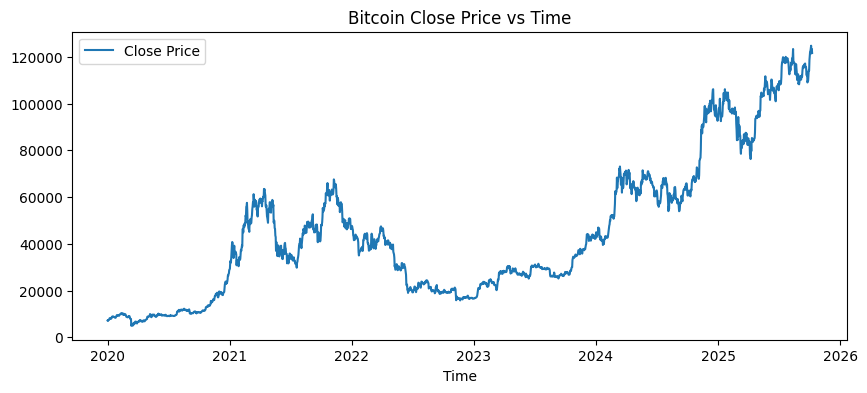

In [4]:
# 2. Show Bitcoin chart
plt.figure(figsize=(10,4))
plt.plot(data["Close"], label='Close Price')
plt.legend()
plt.title("Bitcoin Close Price vs Time")
plt.xlabel("Time")
plt.show()

In [14]:
# 3. Convert data into Keras data format to feed model

def make_dataset(series, seq_len=50, step=1):
    X, y = [], []
    for i in range(0, len(series) - seq_len, step):
        X.append(series[i:i+seq_len])
        y.append(series[i+seq_len])
    X = np.array(X)
    y = np.array(y)

    #print(X.shape)
    # LSTM в Keras очікує форму (samples, timesteps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y


In [24]:

seq_len = 50

np_data = np.asarray(data["Close"])
np_data = np_data / normalizer
X, y = make_dataset(np_data, seq_len=seq_len)



#print(X.shape)

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1647, 50, 1)
(412, 50, 1)


In [26]:
# 4) Побудова моделі
model = models.Sequential([
    layers.Input(shape=(seq_len, 1)),
    layers.LSTM(64, return_sequences=False),  # 64 прихованих одиниць
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # прогноз — одне значення
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    #validation_data=(X_val, y_val)
)

Epoch 1/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2.2207e-04 - mae: 0.0093
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.4748e-06 - mae: 0.0022
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.1648e-06 - mae: 0.0020
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.9577e-06 - mae: 0.0020
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.6537e-06 - mae: 0.0021
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.6508e-06 - mae: 0.0020
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 7.1323e-06 - mae: 0.0019
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.5392e-06 - mae: 0.0020
Epoch 9/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.5973e-06 - mae: 0.0020
Epoch 10/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.4840e-06 - mae: 0.0019
Epoch 11/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.1374e-06 - mae: 0.0018
Epoch 12/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.1150e-06 - m

In [32]:
np_data_test = np.asarray(data_test["Close"])
np_data_test = np_data_test / 1000000

X_t, y_t = make_dataset(np_data_test, seq_len=seq_len)


In [ ]:
#data_test["Predicted Price"] =

Test MSE: 0.00001, Test MAE: 0.00227
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


C:\Users\Denys\AppData\Local\Temp\ipykernel_8580\1008007067.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Denys\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


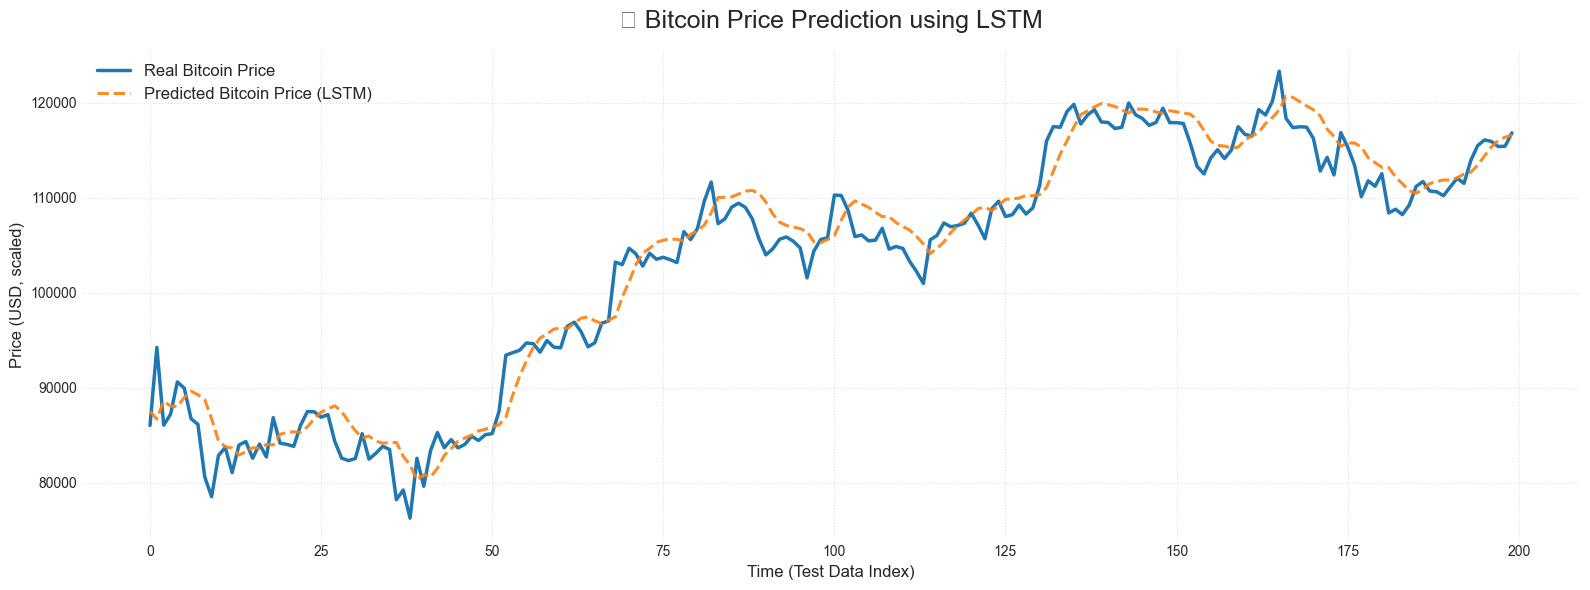

In [33]:
# 6) Оцінка та прогноз
test_loss, test_mae = model.evaluate(X_t, y_t, verbose=0)
print(f"Test MSE: {test_loss:.5f}, Test MAE: {test_mae:.5f}")

# Прогноз на тестовій частині
y_pred = model.predict(X_t).flatten()

# 7) Візуалізація: реальні vs передбачені
plt.figure(figsize=(16, 6))

# Основна лінія — реальні дані
plt.plot(y_t[:200] * 1_000_000,
         label='Real Bitcoin Price',
         color='#1f77b4',
         linewidth=2.5)

# Передбачення — пунктиром, напівпрозорим кольором
plt.plot(y_pred[:200] * 1_000_000,
         label='Predicted Bitcoin Price (LSTM)',
         color='#ff7f0e',
         linestyle='--',
         linewidth=2.2,
         alpha=0.9)

# Візуальні покращення
plt.title("📈 Bitcoin Price Prediction using LSTM", fontsize=18, pad=15)
plt.xlabel("Time (Test Data Index)", fontsize=12)
plt.ylabel("Price (USD, scaled)", fontsize=12)
plt.legend(fontsize=12, frameon=False)
plt.grid(True, linestyle=':', alpha=0.6)

# Згладжені межі, мінімалістичний стиль
plt.tight_layout()
plt.style.use('seaborn-v0_8-whitegrid')

# Тонкі рамки і акуратні осі
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [ ]:
# lets try to predict price for a week ahead


